# Removing unwanted data from the MRI scans

Some of my MRI scans contain too much info. MRI also pick up soft tissues and the temperature in the MRI machine. 
We will solve this by setting all values in a certain region to zero. 

In [276]:
%reset -f 
import nrrd
import numpy as np
import os

In [277]:
# Common square hole parameters (same for all scans)
hole_center_x = 110 # the lower the more to the right in the leg 
hole_center_y = 380 # the higher the more up the leg we go
hole_size = 100  # square side length in voxels
replacement_value = 0
noise_floor = 0.05

# Input files
input_files = [
    # "./data/mri_scan_10.nrrd",
    # "./data/mri_scan_21.nrrd",
    # "./data/mri_scan_32.nrrd",
    # "./data/mri_scan_61.nrrd",
    "./data/mri_scan_99.nrrd",
]

path = input_files[0]
slice_index = 300

def redact_square_balk(volume, cx, cy, size, replacement_value=0.5, threshold=None):
    half = size // 2
    x1, x2 = cx - half, cx + half
    y1, y2 = cy - half, cy + half

    region = volume[y1:y2, :, x1:x2]

    if threshold is not None:
        mask = region > threshold
        region[mask] = replacement_value
    else:
        region[:] = replacement_value

    volume[y1:y2, :, x1:x2] = region
    return volume


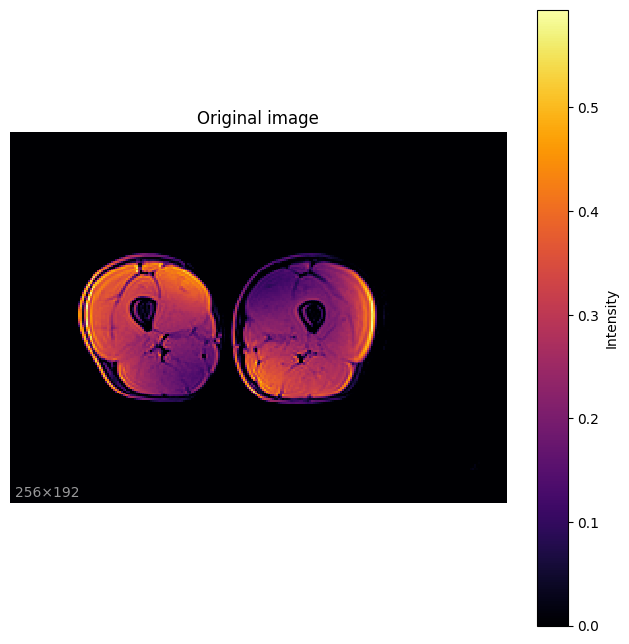

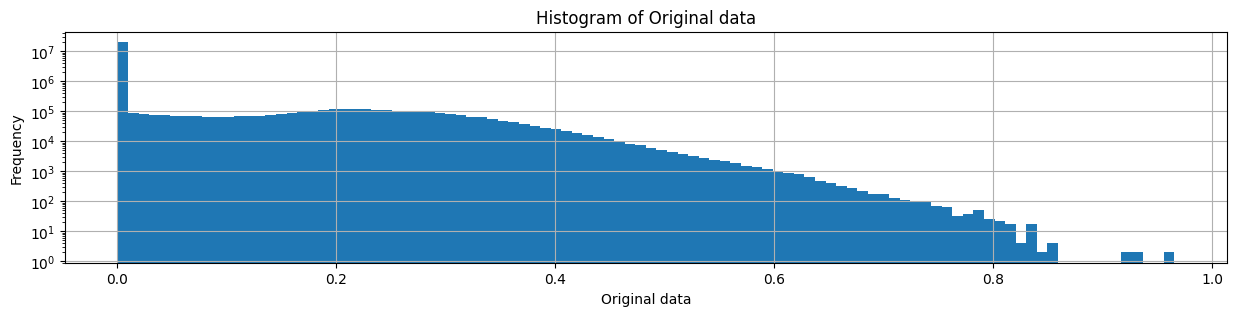

In [278]:
from lib.imageprocesing import remove_fabric_artifacts
from lib.plothelpers import plot_image
from lib.plothelpers import plot_histogram

if not os.path.isfile(path):
    print(f"Missing: {path}")

volume, header = nrrd.read(path)
plot_image(volume[slice_index], "Original image")
plot_histogram(volume, "Original data")


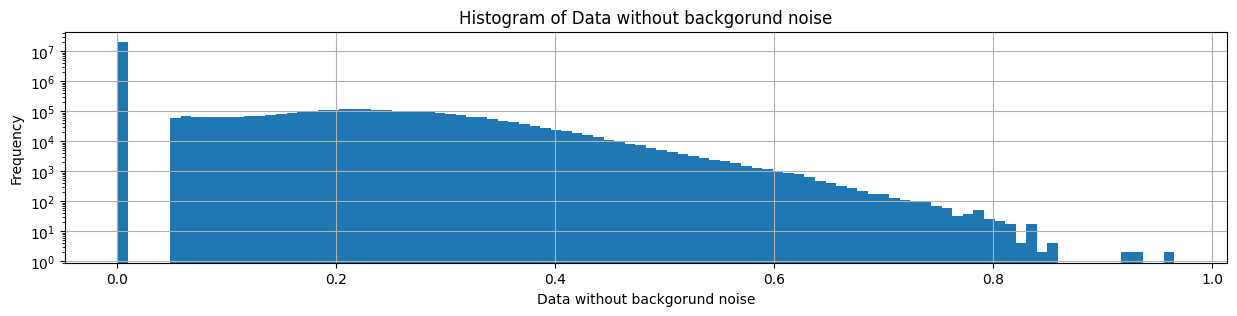

In [279]:
denoised = volume.copy()
denoised[volume < noise_floor] = 0
plot_histogram(denoised, "Data without backgorund noise")


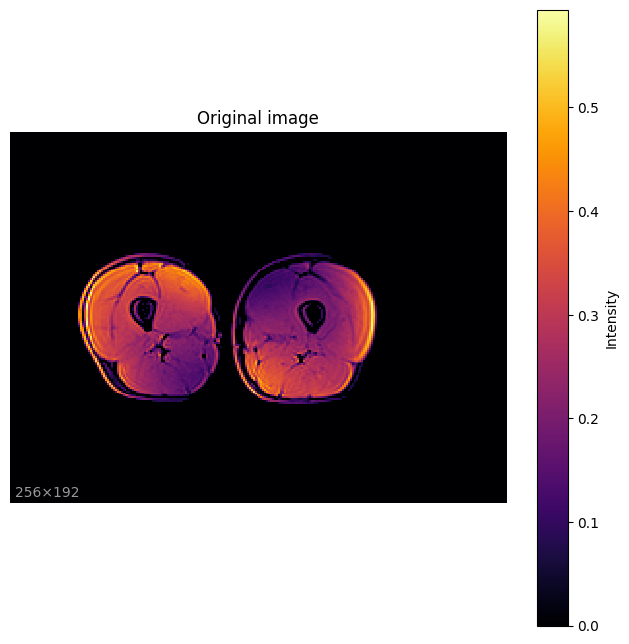

In [280]:
# Remove wiener
redacted = redact_square_balk(denoised, hole_center_x, hole_center_y, hole_size, 
                              replacement_value=replacement_value)
plot_image(redacted[slice_index], "Original image")

In [281]:
output_path = path.replace(".nrrd", "_clean.nrrd")
nrrd.write(output_path, redacted, header)
print(f"Saved: {output_path}")

Saved: ./data/mri_scan_99_clean.nrrd
